In [1]:
import sys
sys.path.insert(0, '../../')  
import math
import numpy as np
import matplotlib.pyplot as plt 
from gasp import process_data_for_gasp, create_data_mask, train_gasp, run_gasp, simulate_ssfp, simulate_ssfp_sampling, simulate_ssfp_simple, SSFPParams, responses, simulation, sampling

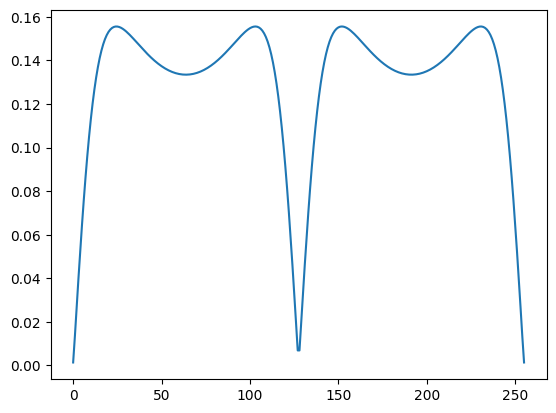

In [17]:
alpha = np.deg2rad(20)
N = 128
rMin = 0.5
rMax = 20
T1T2ratio = np.linspace(rMin, rMax, N)
n_points = 16
TRs = [5e-3, 10e-3, 20e-3]

TRs, PCs = sampling.grid_TR_sampling(n_points=n_points, TRs=TRs)
params = SSFPParams(n_points, alpha, TRs, PCs)
M = simulate_ssfp_simple(T1=1*T1T2ratio[0], T2 =1, params=params)
M2 = simulate_ssfp_simple(T1=1*T1T2ratio[31], T2 =1, params=params)
M3 = simulate_ssfp_simple(T1=1*T1T2ratio[63], T2 =1, params=params)
M3 = simulate_ssfp_simple(T1=1*T1T2ratio[95], T2 =1, params=params)
M4 = simulate_ssfp_simple(T1=1*T1T2ratio[127], T2 =1, params=params)

plt.plot(np.abs(M[0,:,0]))
plt.show()

In [3]:
M.shape

(1, 256, 16)

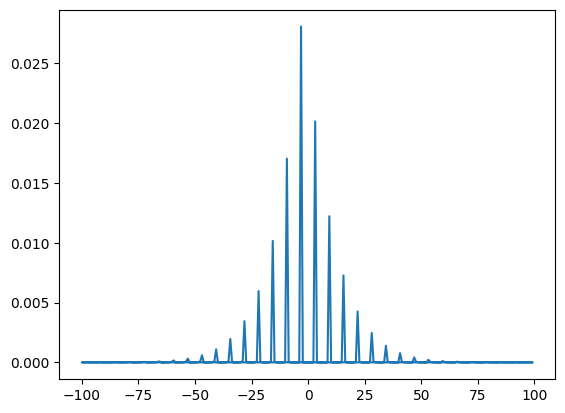

In [16]:
from scipy import signal
f, Pxx = signal.periodogram(M[0,:,2], fs=1/TRs[0], scaling='spectrum') # Original
plt.plot(f, Pxx, label='Original')